### Load and Split Data
Load a CSV file and split Data and labels from data.

Next split train and test data using sklearn train_test_split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')
#f = open("diabetes.csv")
#f.readline()  # skip the header
#data = np.loadtxt(f, delimiter = ',')
diab = pd.read_csv("diabetes.csv")

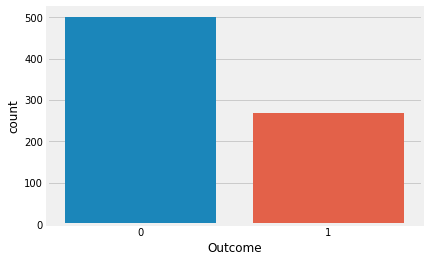

In [2]:
sns.countplot(x='Outcome',data=diab)
plt.show()

### Brief Analysis of Data

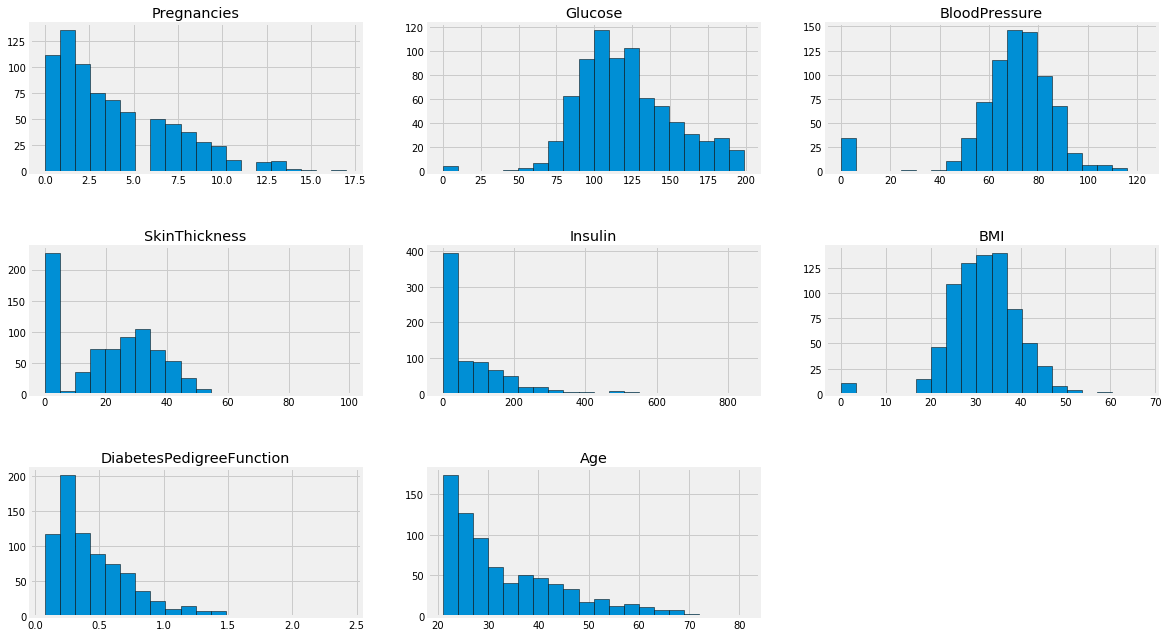

In [3]:
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis of Diabetic Cases

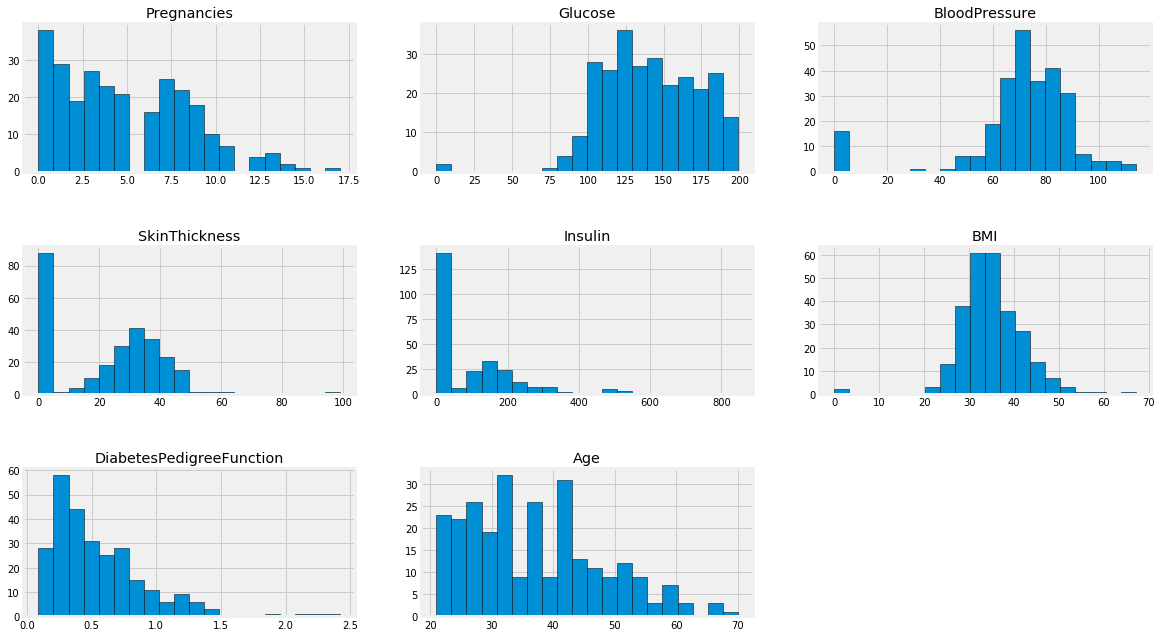

In [4]:
diab1=diab[diab['Outcome']==1]
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [12]:
X = diab.iloc[:, 1: -1]
y = diab.iloc[:, -1:]
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [14]:
X_train = np.asarray(X)
y_train = np.asarray(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Selection using Random Forest
Here we will apply feature selection using random forest classifier.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
New_Train_features = model.transform(X_train)
New_Test_features = model.transform(X_test)
print("Old Shape:", X_train.shape)
print("New Shape", New_Train_features.shape)

Old Shape: (576, 7)
New Shape (576, 3)


c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [17]:
from sklearn.svm import SVC

svmLinear = SVC(kernel="linear")
svmLinearRandom = SVC(kernel="linear")
svmRBF = SVC(kernel="rbf")
svmRBFRandom = SVC(kernel="rbf")

In [18]:
svmLinearOriginal = svmLinear.fit(X_train, y_train)
svmLinearRandom = svmLinearRandom.fit(New_Train_features, y_train)
svmRBFOriginal = svmRBF.fit(X_train, y_train)
svmRBFRandom = svmRBFRandom.fit(New_Train_features, y_train)

c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: Th

In [19]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(svmLinear, 'saved_model.pkl') 

c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['saved_model.pkl']

In [20]:
svmScoreLO = svmLinear.score(X_test, y_test) * 100
svmScoreL = svmLinearRandom.score(New_Test_features, y_test) * 100
svmScoreRO = svmRBF.score(X_test, y_test) * 100
svmScoreR = svmRBFRandom.score(New_Test_features, y_test) * 100
print("SVM with Linear kernel and original Data", svmScoreL)
print("SVM with Linear kernel and original Data", svmScoreLO)
print("SVM with Linear kernel and original Data", svmScoreR)
print("SVM with Linear kernel and original Data", svmScoreRO)

SVM with Linear kernel and original Data 77.60416666666666
SVM with Linear kernel and original Data 79.16666666666666
SVM with Linear kernel and original Data 66.14583333333334
SVM with Linear kernel and original Data 67.70833333333334


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def plotRes(score, statement):
    plt.clf()
    labels = ['True', 'False']
    sizes = [int(svmScore), 100 - int(svmScore)]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=163)
    plt.title(statement)
    plt.axis('equal')
    plt.show()

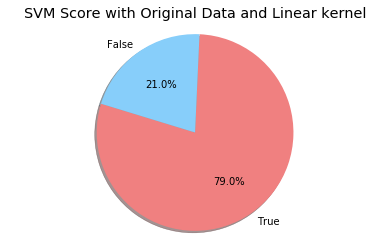

In [23]:
labels = ['True', 'False']
sizes = [int(svmScoreLO), 100 - int(svmScoreLO)]
statement = "SVM Score with Original Data and Linear kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

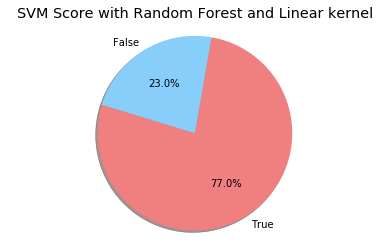

In [24]:
labels = ['True', 'False']
sizes = [int(svmScoreL), 100 - int(svmScoreL)]
statement = "SVM Score with Random Forest and Linear kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

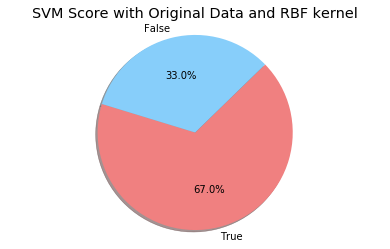

In [25]:
labels = ['True', 'False']
sizes = [int(svmScoreRO), 100 - int(svmScoreRO)]
statement = "SVM Score with Original Data and RBF kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

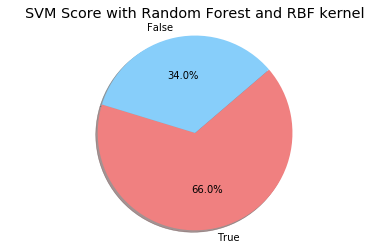

In [26]:
labels = ['True', 'False']
sizes = [int(svmScoreR), 100 - int(svmScoreR)]
statement = "SVM Score with Random Forest and RBF kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()